In [1]:
!nvidia-smi

Sat May  8 14:32:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# !unzip -q bt.zip
# !pip install scikit-plot scipy==1.2.0

In [4]:
import os
import time
import torch
import pickle
import numpy as np
import pandas as pd
from bt.data import *
import torch.nn as nn
from bt.models import *
from bt.utils import *
from torchvision import transforms
import torchvision.utils as vutils
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold, train_test_split
from torchvision.models import inception_v3, resnet50, vgg16, vgg16_bn

In [5]:
batch_size = 32

n_classes = 3

epochs = 1

lr = 3e-4

num_workers = 4

image_size = (299, 299)

class_names = ['Glioma', 'Meningioma', 'Pituitary']

images_dir = 'data/'
model_dir = 'models/'

os.makedirs(model_dir, exist_ok=True)

df = pd.DataFrame(columns=['model', 'accuracy', 'loss', 'precision_class_wise', 'precision_avg', 'recall_class_wise', 'recall_avg', 'f1_class_wise', 'f1_avg'])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

In [6]:
dataset = ImageFolder(root=images_dir)

In [7]:
kfold = KFold(n_splits=5, shuffle=True, random_state=101) 

FOLD 1



/usr/local/lib/python3.7/dist-packages/torchvision/models/inception.py:82: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)



Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.151237  Accuracy: 37.500000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.083418  Accuracy: 40.625000%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.848842  Accuracy: 43.125000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.856781  Accuracy: 47.767857%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.037987  Accuracy: 47.569444%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.945892  Accuracy: 50.568182%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.811761  Accuracy: 52.884615%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.965443  Accuracy: 54.583333%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.716562  Accuracy: 56.066176%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.605893  Accuracy: 57.236842%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.690815  Accuracy: 58.928571%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.593626  Accuracy: 59.782609%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.602969  Accuracy: 61.000000%
Epoch

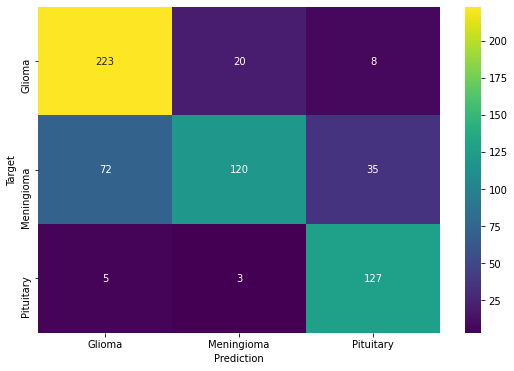


Accuracy Score: 0.7667

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81       251
         1.0       0.84      0.53      0.65       227
         2.0       0.75      0.94      0.83       135

    accuracy                           0.77       613
   macro avg       0.78      0.79      0.76       613
weighted avg       0.78      0.77      0.76       613


Precision Score (Class-Wise): 
[0.74333333 0.83916084 0.74705882]
Average Precision Score: 0.7765176653411947

Recall Score (Class-Wise): 
[0.88844622 0.52863436 0.94074074]
Average Recall Score: 0.7859404390378878

F1 Score (Class-Wise): 
[0.80943739 0.64864865 0.83278689]
Average F1: 0.7636243068214744

Finished Training

Training Duration 0.92 minutes
GPU memory used : 372921856 kb
GPU memory cached : 3273654272 kb


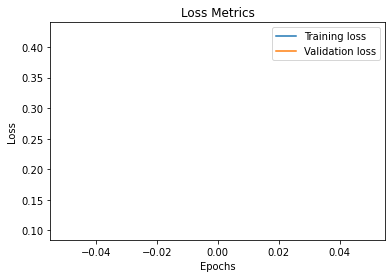

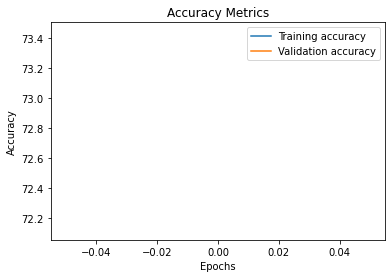

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.166318  Accuracy: 31.250000%
Epoch:  1  batch:      3 [     3/77]  Loss: 0.980555  Accuracy: 46.875000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.029348  Accuracy: 49.375000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.200002  Accuracy: 46.428571%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.125162  Accuracy: 48.611111%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.965721  Accuracy: 50.852273%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.932168  Accuracy: 51.923077%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.874150  Accuracy: 52.916667%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.921569  Accuracy: 54.227941%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.876681  Accuracy: 55.098684%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.712615  Accuracy: 56.696429%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.641777  Accuracy: 58.288043%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.643701  Accuracy: 59.25000

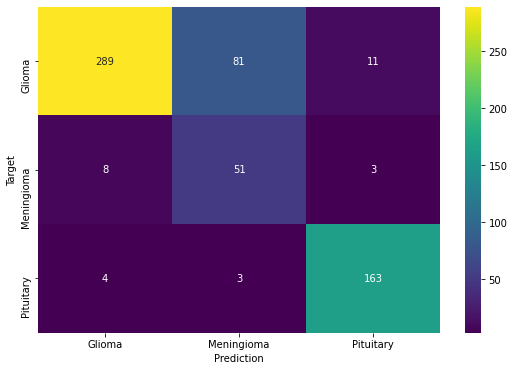


Accuracy Score: 0.8206

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85       381
         1.0       0.38      0.82      0.52        62
         2.0       0.92      0.96      0.94       170

    accuracy                           0.82       613
   macro avg       0.75      0.85      0.77       613
weighted avg       0.89      0.82      0.84       613


Precision Score (Class-Wise): 
[0.96013289 0.37777778 0.92090395]
Average Precision Score: 0.7529382076484953

Recall Score (Class-Wise): 
[0.75853018 0.82258065 0.95882353]
Average Recall Score: 0.8466447861000298

F1 Score (Class-Wise): 
[0.84750733 0.5177665  0.93948127]
Average F1: 0.7682516989505851

Finished Training

Training Duration 0.92 minutes
GPU memory used : 373992960 kb
GPU memory cached : 3296722944 kb


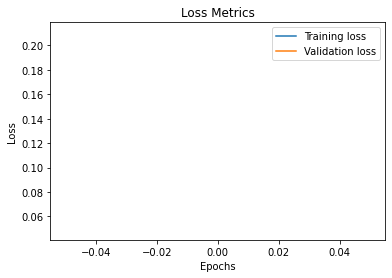

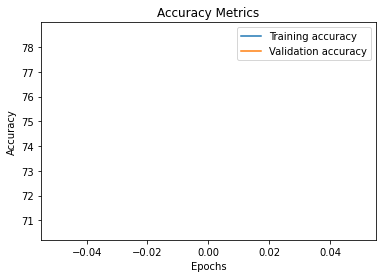

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.168713  Accuracy: 25.000000%
Epoch:  1  batch:      3 [     3/77]  Loss: 0.967483  Accuracy: 38.541667%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.984737  Accuracy: 45.000000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.085179  Accuracy: 45.982143%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.007056  Accuracy: 46.875000%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.026802  Accuracy: 47.443182%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.846163  Accuracy: 49.519231%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.741840  Accuracy: 52.708333%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.744465  Accuracy: 54.411765%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.868167  Accuracy: 56.085526%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.614330  Accuracy: 58.333333%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.561119  Accuracy: 58.967391%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.549527  Accuracy: 59.50000

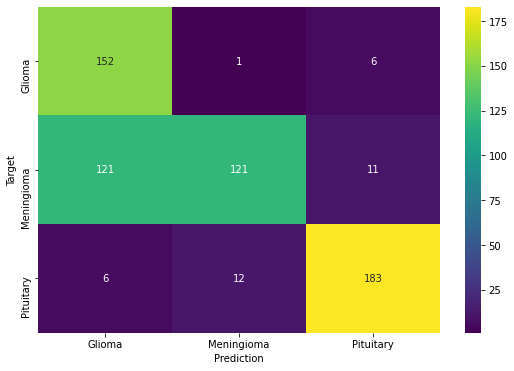


Accuracy Score: 0.7439

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.54      0.96      0.69       159
         1.0       0.90      0.48      0.63       253
         2.0       0.92      0.91      0.91       201

    accuracy                           0.74       613
   macro avg       0.79      0.78      0.74       613
weighted avg       0.81      0.74      0.74       613


Precision Score (Class-Wise): 
[0.54480287 0.90298507 0.915     ]
Average Precision Score: 0.787595980670126

Recall Score (Class-Wise): 
[0.95597484 0.47826087 0.91044776]
Average Recall Score: 0.781561157842181

F1 Score (Class-Wise): 
[0.69406393 0.625323   0.9127182 ]
Average F1: 0.7440350429484793

Finished Training

Training Duration 0.92 minutes
GPU memory used : 372719104 kb
GPU memory cached : 3298820096 kb


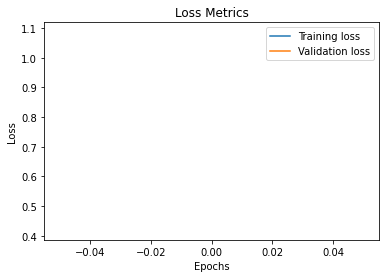

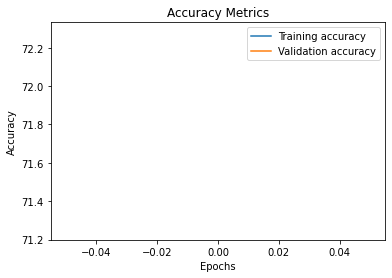

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.132763  Accuracy: 31.250000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.208825  Accuracy: 41.666667%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.123622  Accuracy: 49.375000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.926342  Accuracy: 51.785714%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.172191  Accuracy: 51.041667%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.153523  Accuracy: 50.568182%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.690212  Accuracy: 52.644231%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.595370  Accuracy: 55.000000%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.770344  Accuracy: 55.882353%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.862990  Accuracy: 56.743421%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.706808  Accuracy: 57.440476%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.536633  Accuracy: 59.375000%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.673321  Accuracy: 60.50000

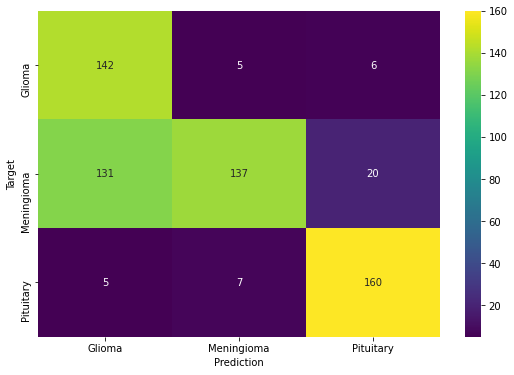


Accuracy Score: 0.7162

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.51      0.93      0.66       153
         1.0       0.92      0.48      0.63       288
         2.0       0.86      0.93      0.89       172

    accuracy                           0.72       613
   macro avg       0.76      0.78      0.73       613
weighted avg       0.80      0.72      0.71       613


Precision Score (Class-Wise): 
[0.51079137 0.91946309 0.86021505]
Average Precision Score: 0.763489835972746

Recall Score (Class-Wise): 
[0.92810458 0.47569444 0.93023256]
Average Recall Score: 0.7780105259157927

F1 Score (Class-Wise): 
[0.65893271 0.62700229 0.89385475]
Average F1: 0.7265965838500136

Finished Training

Training Duration 0.92 minutes
GPU memory used : 374146560 kb
GPU memory cached : 3298820096 kb


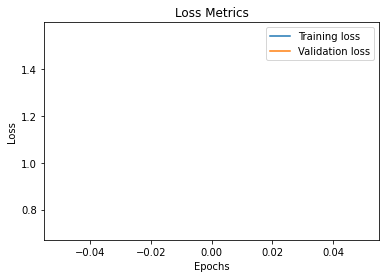

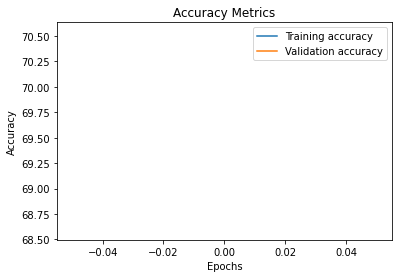

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.138156  Accuracy: 31.250000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.022879  Accuracy: 38.541667%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.982867  Accuracy: 45.625000%
Epoch:  1  batch:      7 [     7/77]  Loss: 0.950242  Accuracy: 45.982143%
Epoch:  1  batch:      9 [     9/77]  Loss: 0.887257  Accuracy: 49.652778%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.128137  Accuracy: 50.000000%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.868645  Accuracy: 51.923077%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.002580  Accuracy: 53.125000%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.866151  Accuracy: 55.514706%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.756907  Accuracy: 56.578947%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.591539  Accuracy: 58.035714%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.548868  Accuracy: 59.646739%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.653621  Accuracy: 60.62500

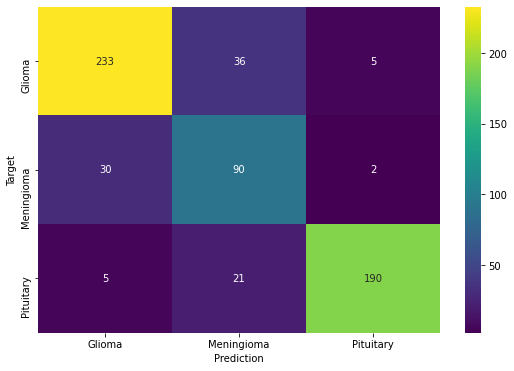


Accuracy Score: 0.8382

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       274
         1.0       0.61      0.74      0.67       122
         2.0       0.96      0.88      0.92       216

    accuracy                           0.84       612
   macro avg       0.82      0.82      0.82       612
weighted avg       0.85      0.84      0.84       612


Precision Score (Class-Wise): 
[0.86940299 0.6122449  0.96446701]
Average Precision Score: 0.8153716293699843

Recall Score (Class-Wise): 
[0.85036496 0.73770492 0.87962963]
Average Recall Score: 0.8225665037220221

F1 Score (Class-Wise): 
[0.8597786  0.66914498 0.92009685]
Average F1: 0.8163401438329533

Finished Training

Training Duration 0.93 minutes
GPU memory used : 378203648 kb
GPU memory cached : 3298820096 kb


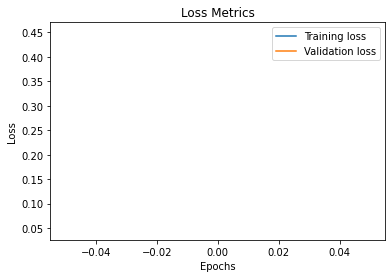

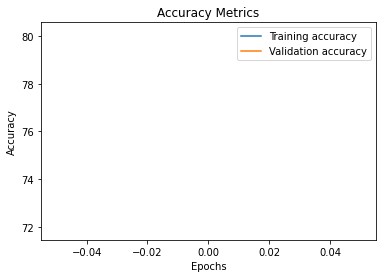

In [8]:
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'inceptionv3_wo_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=plain_transform)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = inception_v3(aux_logits=False)

    model.fc = nn.Linear(model.fc.in_features, 3)
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb".format(torch.cuda.memory_reserved()))

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr) 

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('inceptionv3_test_results.csv', index=False)

FOLD 1



/usr/local/lib/python3.7/dist-packages/torchvision/models/inception.py:82: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)



Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.059967  Accuracy: 43.750000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.580948  Accuracy: 55.722403%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.409714  Accuracy: 62.194625%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.296017  Accuracy: 65.033967%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.568473  Accuracy: 66.359095%
Epoch 1 | Training Accuracy: 66.359093% | Training Loss: 0.568473
Test accuracy: 81.209419% | Test Loss: 0.040299
Test accuracy (wo augmentation): 81.655846% | Test Loss: 0.017098
Test Metrics: 



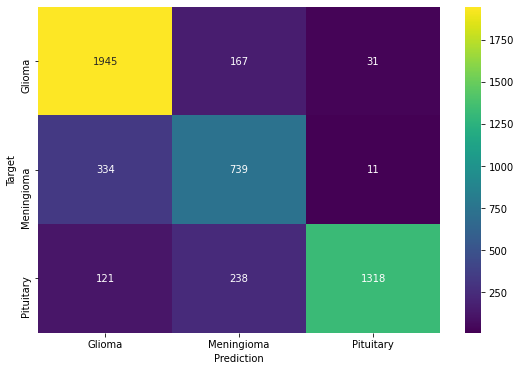


Accuracy Score: 0.8161

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      2143
         1.0       0.65      0.68      0.66      1084
         2.0       0.97      0.79      0.87      1677

    accuracy                           0.82      4904
   macro avg       0.81      0.79      0.80      4904
weighted avg       0.83      0.82      0.82      4904


Precision Score (Class-Wise): 
[0.81041667 0.64597902 0.96911765]
Average Precision Score: 0.8085044449015037

Recall Score (Class-Wise): 
[0.90760616 0.68173432 0.78592725]
Average Recall Score: 0.7917559093253548

F1 Score (Class-Wise): 
[0.85626238 0.66337522 0.8679618 ]
Average F1: 0.7958664701716255



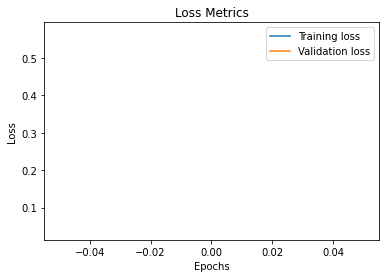

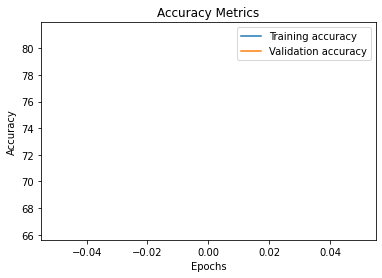

Test Metrics (wo augmentation): 



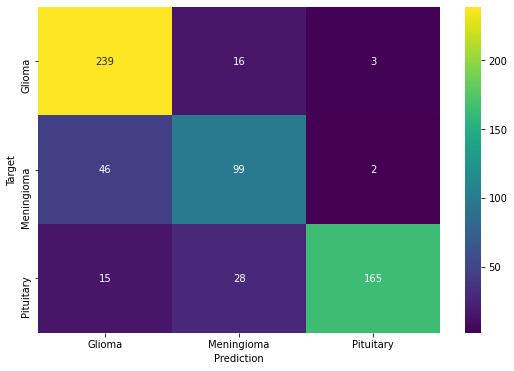


Accuracy Score: 0.8206

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       258
         1.0       0.69      0.67      0.68       147
         2.0       0.97      0.79      0.87       208

    accuracy                           0.82       613
   macro avg       0.82      0.80      0.80       613
weighted avg       0.83      0.82      0.82       613


Precision Score (Class-Wise): 
[0.79666667 0.69230769 0.97058824]
Average Precision Score: 0.8198541980894922

Recall Score (Class-Wise): 
[0.92635659 0.67346939 0.79326923]
Average Recall Score: 0.7976984025572066

F1 Score (Class-Wise): 
[0.85663082 0.68275862 0.87301587]
Average F1: 0.804135106026096



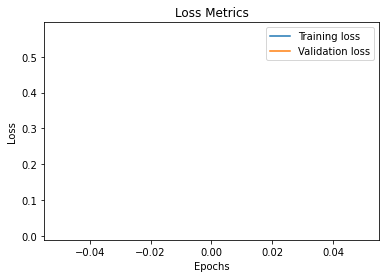

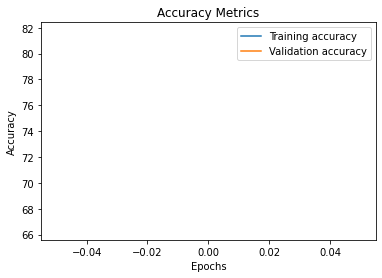

Finished Training

Training Duration 4.39 minutes
GPU memory used : 378502656 kb
GPU memory cached : 3298820096 kb

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.113725  Accuracy: 46.875000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.298532  Accuracy: 53.591721%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.692919  Accuracy: 59.649837%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.157442  Accuracy: 63.430707%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.206700  Accuracy: 66.996330%
Epoch 1 | Training Accuracy: 66.996330% | Training Loss: 0.206700
Test accuracy: 67.329544% | Test Loss: 2.208192
Test accuracy (wo augmentation): 69.805191% | Test Loss: 0.547962
Test Metrics: 



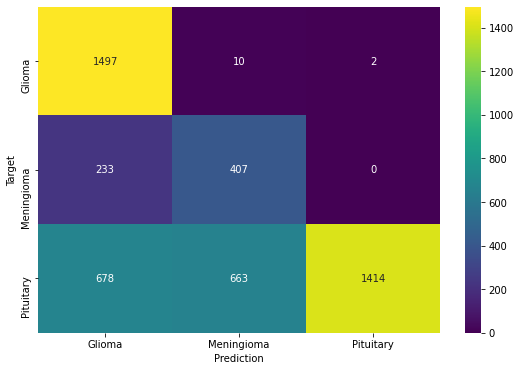


Accuracy Score: 0.6766

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.62      0.99      0.76      1509
         1.0       0.38      0.64      0.47       640
         2.0       1.00      0.51      0.68      2755

    accuracy                           0.68      4904
   macro avg       0.67      0.71      0.64      4904
weighted avg       0.80      0.68      0.68      4904


Precision Score (Class-Wise): 
[0.62167774 0.37685185 0.99858757]
Average Precision Score: 0.6657057211123694

Recall Score (Class-Wise): 
[0.99204771 0.6359375  0.51324864]
Average Recall Score: 0.7137446175187231

F1 Score (Class-Wise): 
[0.76436048 0.47325581 0.67801486]
Average F1: 0.6385437194845062



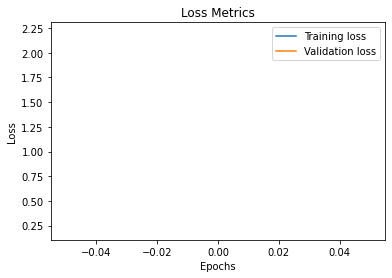

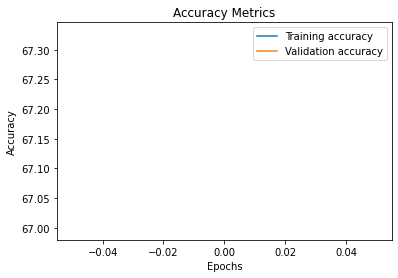

Test Metrics (wo augmentation): 



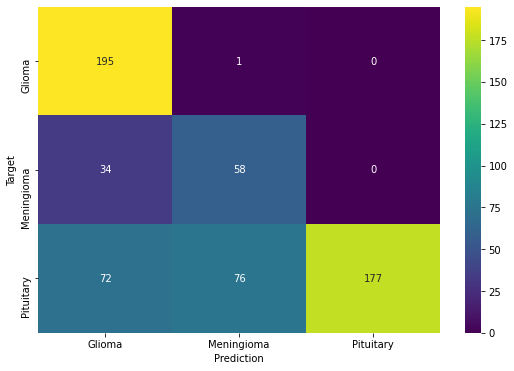


Accuracy Score: 0.7015

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.65      0.99      0.78       196
         1.0       0.43      0.63      0.51        92
         2.0       1.00      0.54      0.71       325

    accuracy                           0.70       613
   macro avg       0.69      0.72      0.67       613
weighted avg       0.80      0.70      0.70       613


Precision Score (Class-Wise): 
[0.64784053 0.42962963 1.        ]
Average Precision Score: 0.6924900537303639

Recall Score (Class-Wise): 
[0.99489796 0.63043478 0.54461538]
Average Recall Score: 0.7233160421359179

F1 Score (Class-Wise): 
[0.78470825 0.51101322 0.70517928]
Average F1: 0.6669669160748462



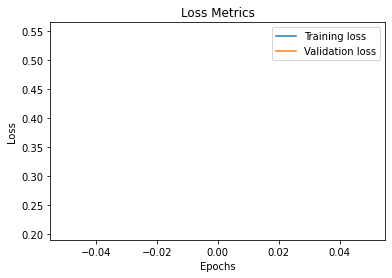

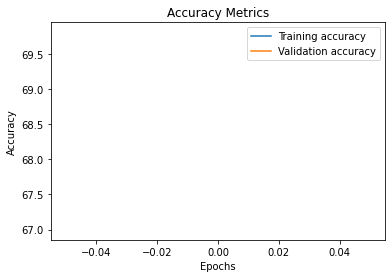

Finished Training

Training Duration 4.39 minutes
GPU memory used : 377271808 kb
GPU memory cached : 3298820096 kb

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.094486  Accuracy: 25.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.516345  Accuracy: 55.275974%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.379632  Accuracy: 60.372557%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.212798  Accuracy: 62.574728%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.175538  Accuracy: 65.268148%
Epoch 1 | Training Accuracy: 65.268150% | Training Loss: 0.175538
Test accuracy: 80.661530% | Test Loss: 0.011360
Test accuracy (wo augmentation): 81.006493% | Test Loss: 0.287585
Test Metrics: 



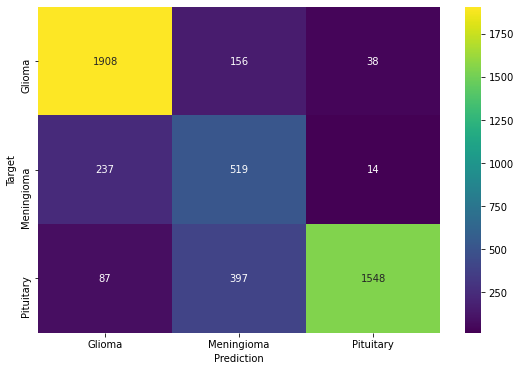


Accuracy Score: 0.8106

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      2102
         1.0       0.48      0.67      0.56       770
         2.0       0.97      0.76      0.85      2032

    accuracy                           0.81      4904
   macro avg       0.77      0.78      0.77      4904
weighted avg       0.84      0.81      0.82      4904


Precision Score (Class-Wise): 
[0.85483871 0.48414179 0.9675    ]
Average Precision Score: 0.7688268335740652

Recall Score (Class-Wise): 
[0.90770695 0.67402597 0.76181102]
Average Recall Score: 0.7811813144713194

F1 Score (Class-Wise): 
[0.88047993 0.56351792 0.85242291]
Average F1: 0.7654735829878795



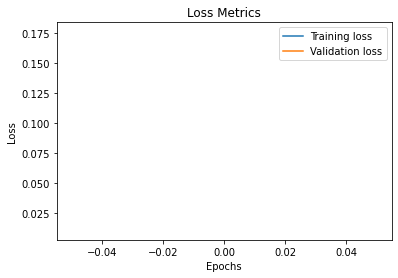

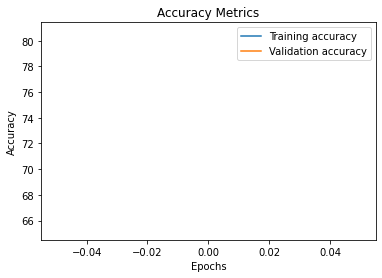

Test Metrics (wo augmentation): 



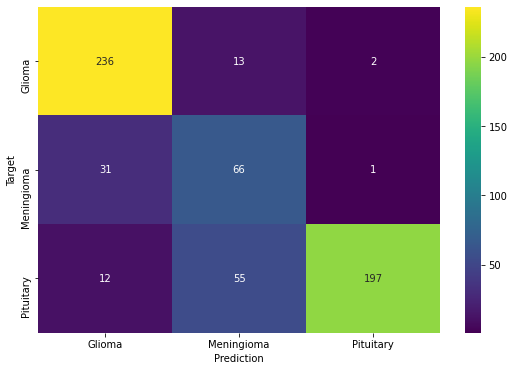


Accuracy Score: 0.8140

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       251
         1.0       0.49      0.67      0.57        98
         2.0       0.98      0.75      0.85       264

    accuracy                           0.81       613
   macro avg       0.77      0.79      0.77       613
weighted avg       0.85      0.81      0.82       613


Precision Score (Class-Wise): 
[0.84587814 0.49253731 0.985     ]
Average Precision Score: 0.7744718165445175

Recall Score (Class-Wise): 
[0.94023904 0.67346939 0.74621212]
Average Recall Score: 0.7866401842639749

F1 Score (Class-Wise): 
[0.89056604 0.56896552 0.84913793]
Average F1: 0.769556495337237



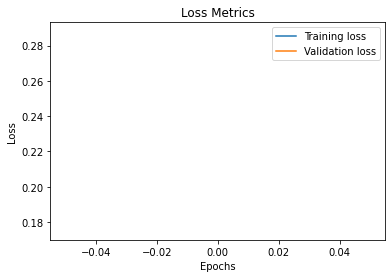

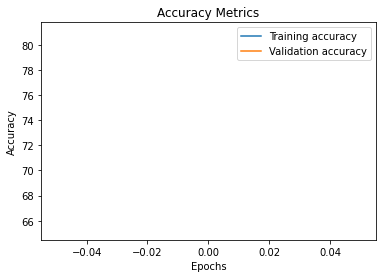

Finished Training

Training Duration 4.39 minutes
GPU memory used : 375305728 kb
GPU memory cached : 3298820096 kb

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.188084  Accuracy: 31.250000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.791701  Accuracy: 55.945617%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.513332  Accuracy: 63.080212%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.207288  Accuracy: 64.816576%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.775761  Accuracy: 65.645392%
Epoch 1 | Training Accuracy: 65.645393% | Training Loss: 1.775761
Test accuracy: 63.230518% | Test Loss: 1.341771
Test accuracy (wo augmentation): 64.610390% | Test Loss: 1.145905
Test Metrics: 



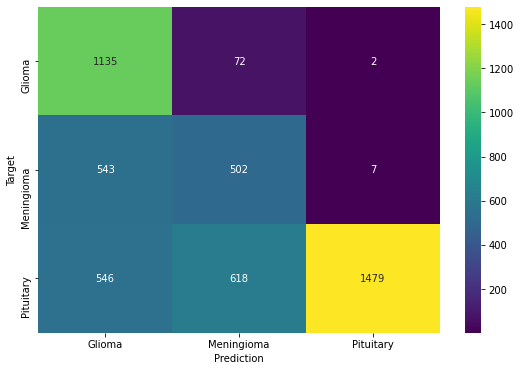


Accuracy Score: 0.6354

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.51      0.94      0.66      1209
         1.0       0.42      0.48      0.45      1052
         2.0       0.99      0.56      0.72      2643

    accuracy                           0.64      4904
   macro avg       0.64      0.66      0.61      4904
weighted avg       0.75      0.64      0.64      4904


Precision Score (Class-Wise): 
[0.51034173 0.42114094 0.99395161]
Average Precision Score: 0.6418114263730821

Recall Score (Class-Wise): 
[0.93879239 0.47718631 0.55959137]
Average Recall Score: 0.6585233585438798

F1 Score (Class-Wise): 
[0.66122925 0.44741533 0.71604938]
Average F1: 0.6082313193473804



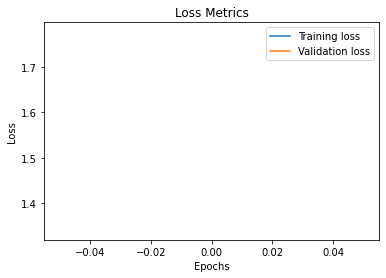

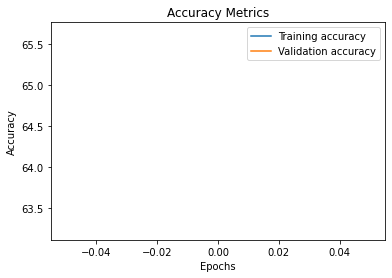

Test Metrics (wo augmentation): 



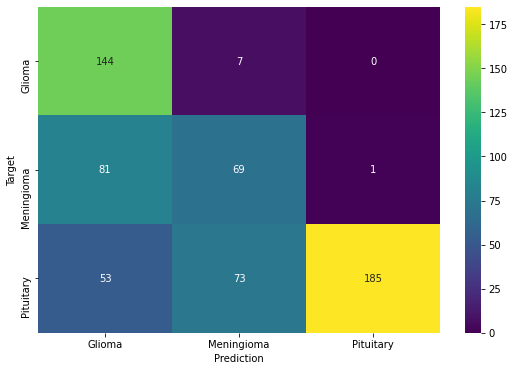


Accuracy Score: 0.6493

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.52      0.95      0.67       151
         1.0       0.46      0.46      0.46       151
         2.0       0.99      0.59      0.74       311

    accuracy                           0.65       613
   macro avg       0.66      0.67      0.63       613
weighted avg       0.75      0.65      0.66       613


Precision Score (Class-Wise): 
[0.51798561 0.46308725 0.99462366]
Average Precision Score: 0.6585655052489725

Recall Score (Class-Wise): 
[0.95364238 0.45695364 0.59485531]
Average Recall Score: 0.6684837773187681

F1 Score (Class-Wise): 
[0.67132867 0.46       0.7444668 ]
Average F1: 0.6252651573778335



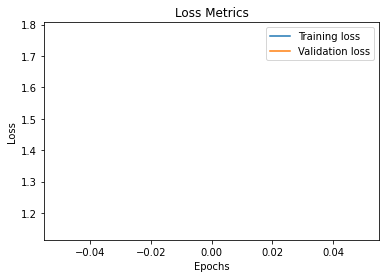

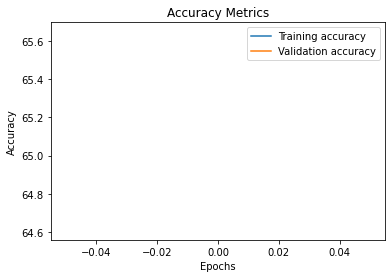

Finished Training

Training Duration 4.41 minutes
GPU memory used : 373519872 kb
GPU memory cached : 3298820096 kb

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.055660  Accuracy: 43.750000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.007452  Accuracy: 61.444805%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.907220  Accuracy: 62.846091%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.500090  Accuracy: 64.578804%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.957266  Accuracy: 66.445759%
Epoch 1 | Training Accuracy: 66.445755% | Training Loss: 0.957266
Test accuracy: 82.659317% | Test Loss: 0.356818
Test accuracy (wo augmentation): 84.477127% | Test Loss: 0.080912
Test Metrics: 



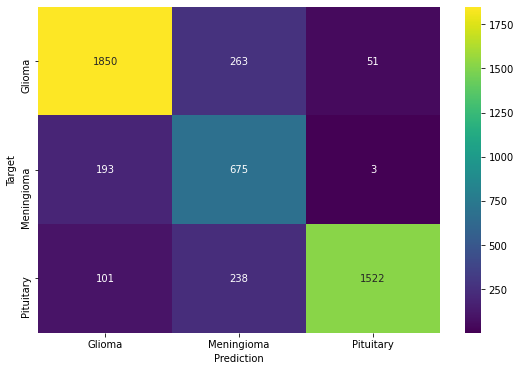


Accuracy Score: 0.8266

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      2164
         1.0       0.57      0.77      0.66       871
         2.0       0.97      0.82      0.89      1861

    accuracy                           0.83      4896
   macro avg       0.80      0.82      0.80      4896
weighted avg       0.85      0.83      0.83      4896


Precision Score (Class-Wise): 
[0.86287313 0.57397959 0.96573604]
Average Precision Score: 0.8008629222580766

Recall Score (Class-Wise): 
[0.85489834 0.7749713  0.81783987]
Average Recall Score: 0.8159031682701606

F1 Score (Class-Wise): 
[0.85886722 0.65950171 0.8856561 ]
Average F1: 0.8013416763403471



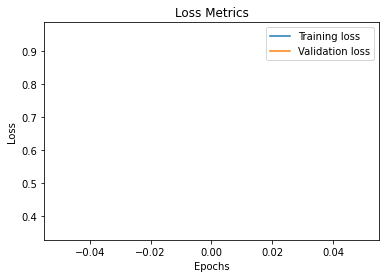

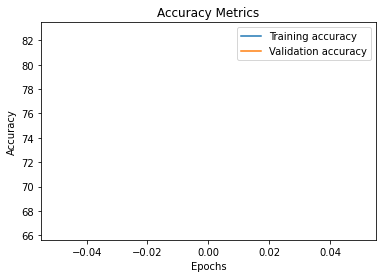

Test Metrics (wo augmentation): 



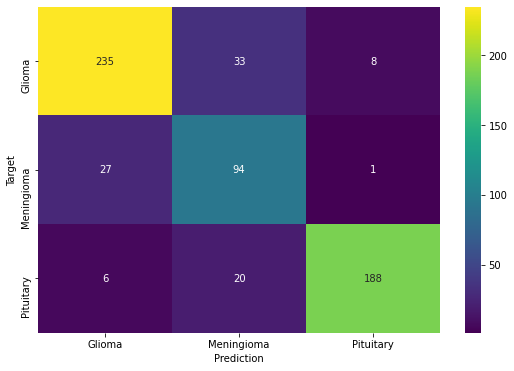


Accuracy Score: 0.8448

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       276
         1.0       0.64      0.77      0.70       122
         2.0       0.95      0.88      0.91       214

    accuracy                           0.84       612
   macro avg       0.82      0.83      0.83       612
weighted avg       0.86      0.84      0.85       612


Precision Score (Class-Wise): 
[0.87686567 0.63945578 0.95431472]
Average Precision Score: 0.8235453915889663

Recall Score (Class-Wise): 
[0.85144928 0.7704918  0.87850467]
Average Recall Score: 0.8334819171794012

F1 Score (Class-Wise): 
[0.86397059 0.69888476 0.91484185]
Average F1: 0.8258990652493416



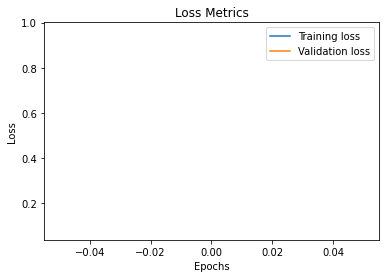

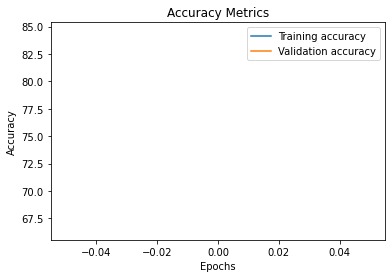

Finished Training

Training Duration 4.39 minutes
GPU memory used : 384613888 kb
GPU memory cached : 3300917248 kb



In [9]:
batch_size = 4 # generates 7 new images + original image - per image, 4 * 8 = 32 images per batch

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'inceptionv3_w_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=augmentor)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=augmentor)
    
    testloader_plain = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = inception_v3(aux_logits=False)

    model.fc = nn.Linear(model.fc.in_features, 3)
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []
    test_corr_a = []
    test_loss_a = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size * 8) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size * 8) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * 8 * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

        with torch.no_grad():
          correct = 0
          labels_a = []
          pred_a = []

          new_y = 0.0

          # perform test set evaluation batch wise
          for b, (X, y) in enumerate(testloader_plain):
              b += 1
              # set label to use CUDA if available
              X, y = X.to(device), y.to(device)

              labels_a.extend(y.view(-1).cpu().numpy())

              # perform forward pass
              y_val = model(X).view(-1, n_classes)

              # get argmax of predicted values, which is our label
              predicted = torch.argmax(y_val.data, dim=1).view(-1)

              # append predicted label
              pred_a.extend(predicted.cpu().numpy())

              # calculate loss
              loss = criterion(y_val, y)

              # increment correct with correcly predicted labels per batch
              correct += (predicted == y).sum()

          # append correct samples labels and losses
          test_corr_a.append(correct.item()*100/(batch_size * b))

          test_loss_a.append(loss.item())

        labels_a = torch.Tensor(labels_a)
        pred_a = torch.Tensor(pred_a)

        print(f"Test accuracy (wo augmentation): {torch.mean(torch.tensor(test_corr_a)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss_a)):.6f}")

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr)
       
    print("Test Metrics (wo augmentation): \n")

    plot_confusion_matrix(pred_a, labels_a, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred_a, labels_a)
    
    values = {'model': model_name + '_test_plain', 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss_a)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss_a) 
    plot_accuracy(training_accuracies, test_corr_a)
    
    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb\n".format(torch.cuda.memory_reserved()))

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('inceptionv3_test_results.csv', index=False)

FOLD 1



/usr/local/lib/python3.7/dist-packages/torchvision/models/inception.py:82: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)



Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.095355  Accuracy: 28.125000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.132127  Accuracy: 28.125000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.107739  Accuracy: 35.000000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.133816  Accuracy: 37.500000%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.040930  Accuracy: 39.236111%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.104965  Accuracy: 39.772727%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.052185  Accuracy: 40.144231%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.126229  Accuracy: 41.666667%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.068712  Accuracy: 42.095588%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.037897  Accuracy: 42.105263%
Epoch:  1  batch:     21 [    21/77]  Loss: 0.984864  Accuracy: 42.857143%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.002343  Accuracy: 43.478261%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.030905  Accuracy: 43.125000%
Epoch

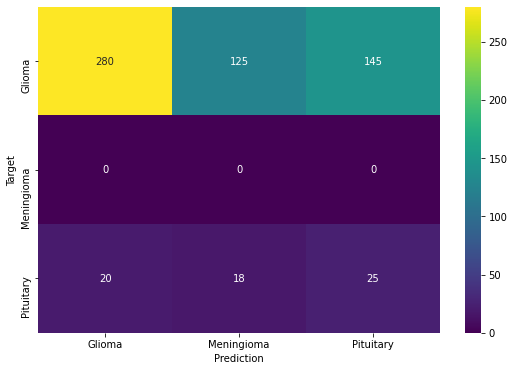


Accuracy Score: 0.4976

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.93      0.51      0.66       550
         1.0       0.00      0.00      0.00         0
         2.0       0.15      0.40      0.21        63

    accuracy                           0.50       613
   macro avg       0.36      0.30      0.29       613
weighted avg       0.85      0.50      0.61       613


Precision Score (Class-Wise): 
[0.93333333 0.         0.14705882]
Average Precision Score: 0.36013071895424836

Recall Score (Class-Wise): 
[0.50909091 0.         0.3968254 ]
Average Recall Score: 0.30197210197210195

F1 Score (Class-Wise): 
[0.65882353 0.         0.21459227]
Average F1: 0.2911386013632921

Finished Training

Training Duration 0.74 minutes
GPU memory used : 107492352 kb
GPU memory cached : 3300917248 kb


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


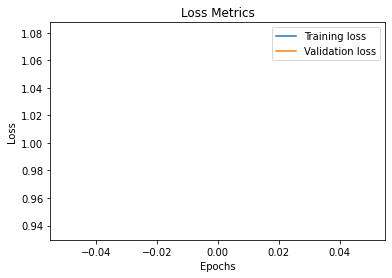

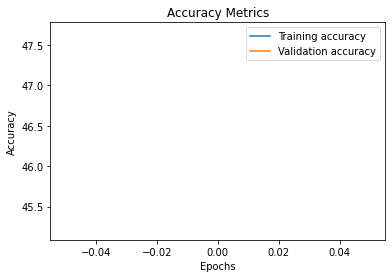

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.126186  Accuracy: 25.000000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.094040  Accuracy: 34.375000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.038780  Accuracy: 38.125000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.148228  Accuracy: 36.607143%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.157526  Accuracy: 36.458333%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.125656  Accuracy: 38.068182%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.005307  Accuracy: 39.423077%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.083893  Accuracy: 38.958333%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.157506  Accuracy: 40.257353%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.134110  Accuracy: 40.789474%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.083272  Accuracy: 41.369048%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.103564  Accuracy: 41.440217%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.956831  Accuracy: 42.12500

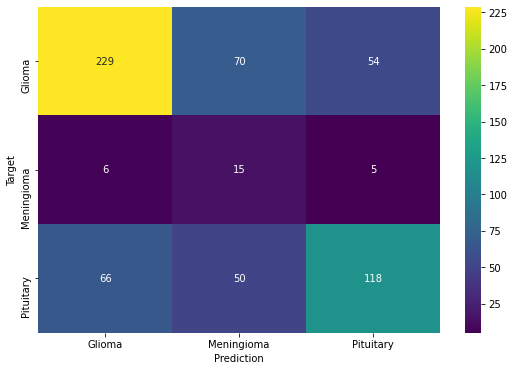


Accuracy Score: 0.5905

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70       353
         1.0       0.11      0.58      0.19        26
         2.0       0.67      0.50      0.57       234

    accuracy                           0.59       613
   macro avg       0.51      0.58      0.49       613
weighted avg       0.70      0.59      0.63       613


Precision Score (Class-Wise): 
[0.76079734 0.11111111 0.66666667]
Average Precision Score: 0.5128583733234896

Recall Score (Class-Wise): 
[0.64872521 0.57692308 0.5042735 ]
Average Recall Score: 0.5766405978870568

F1 Score (Class-Wise): 
[0.70030581 0.1863354  0.57420925]
Average F1: 0.4869501532887847

Finished Training

Training Duration 0.74 minutes
GPU memory used : 109200384 kb
GPU memory cached : 3300917248 kb


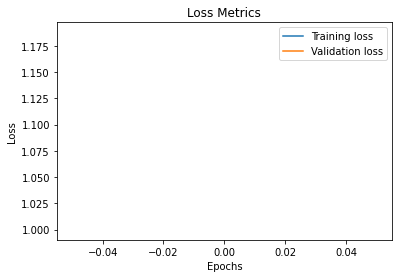

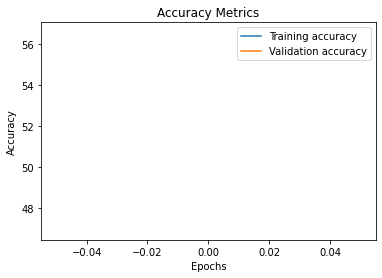

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.190032  Accuracy: 34.375000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.125624  Accuracy: 28.125000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.077959  Accuracy: 33.125000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.046684  Accuracy: 37.500000%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.038539  Accuracy: 40.277778%
Epoch:  1  batch:     11 [    11/77]  Loss: 0.909220  Accuracy: 43.750000%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.142716  Accuracy: 43.990385%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.151601  Accuracy: 43.750000%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.151559  Accuracy: 44.669118%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.022009  Accuracy: 44.736842%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.034435  Accuracy: 44.791667%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.066339  Accuracy: 44.836957%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.084006  Accuracy: 44.25000

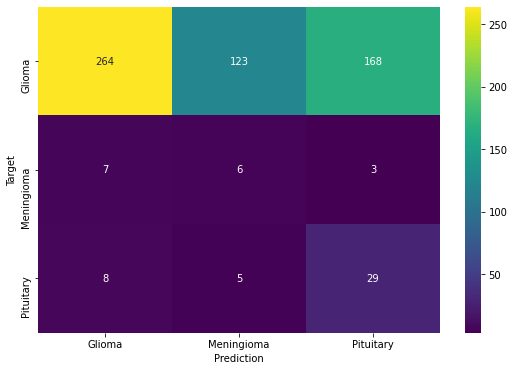


Accuracy Score: 0.4878

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.95      0.48      0.63       555
         1.0       0.04      0.38      0.08        16
         2.0       0.14      0.69      0.24        42

    accuracy                           0.49       613
   macro avg       0.38      0.51      0.32       613
weighted avg       0.87      0.49      0.59       613


Precision Score (Class-Wise): 
[0.94623656 0.04477612 0.145     ]
Average Precision Score: 0.37867089284759

Recall Score (Class-Wise): 
[0.47567568 0.375      0.69047619]
Average Recall Score: 0.5137172887172887

F1 Score (Class-Wise): 
[0.63309353 0.08       0.23966942]
Average F1: 0.31758764888915314

Finished Training

Training Duration 0.74 minutes
GPU memory used : 108338176 kb
GPU memory cached : 3300917248 kb


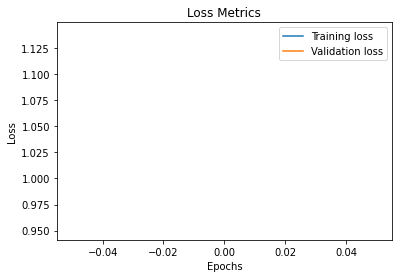

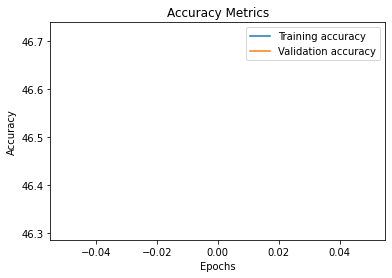

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.099794  Accuracy: 50.000000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.062776  Accuracy: 48.958333%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.131928  Accuracy: 46.875000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.114833  Accuracy: 45.089286%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.098944  Accuracy: 43.750000%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.003697  Accuracy: 47.727273%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.033830  Accuracy: 47.115385%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.063157  Accuracy: 46.875000%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.110905  Accuracy: 46.691176%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.915098  Accuracy: 48.519737%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.019564  Accuracy: 47.916667%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.022229  Accuracy: 47.690217%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.889158  Accuracy: 48.37500

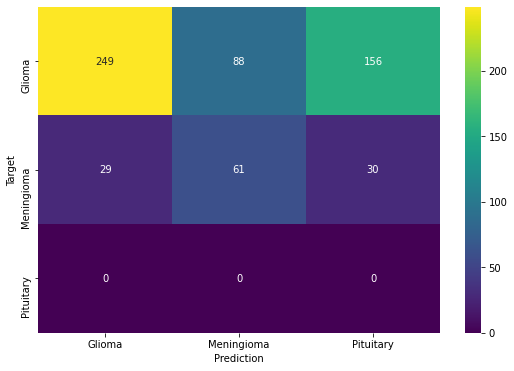


Accuracy Score: 0.5057

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.90      0.51      0.65       493
         1.0       0.41      0.51      0.45       120
         2.0       0.00      0.00      0.00         0

    accuracy                           0.51       613
   macro avg       0.44      0.34      0.37       613
weighted avg       0.80      0.51      0.61       613


Precision Score (Class-Wise): 
[0.89568345 0.40939597 0.        ]
Average Precision Score: 0.43502647546392414

Recall Score (Class-Wise): 
[0.50507099 0.50833333 0.        ]
Average Recall Score: 0.33780144241604687

F1 Score (Class-Wise): 
[0.6459144 0.4535316 0.       ]
Average F1: 0.3664819984667235

Finished Training

Training Duration 0.74 minutes
GPU memory used : 109140992 kb
GPU memory cached : 3300917248 kb


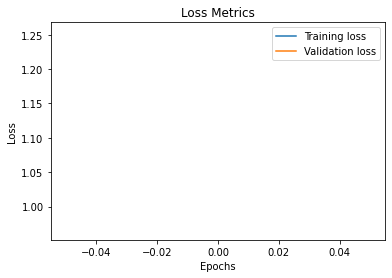

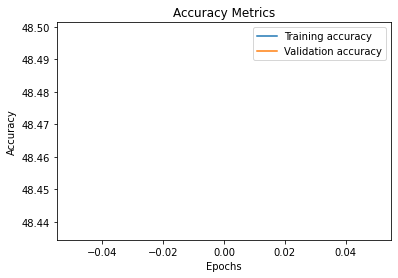

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.111403  Accuracy: 50.000000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.032525  Accuracy: 46.875000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.182815  Accuracy: 46.250000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.041008  Accuracy: 47.767857%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.135616  Accuracy: 47.916667%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.116198  Accuracy: 46.875000%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.100258  Accuracy: 46.634615%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.062208  Accuracy: 46.250000%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.060018  Accuracy: 47.610294%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.010881  Accuracy: 48.026316%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.097975  Accuracy: 47.619048%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.026086  Accuracy: 47.690217%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.044085  Accuracy: 47.87500

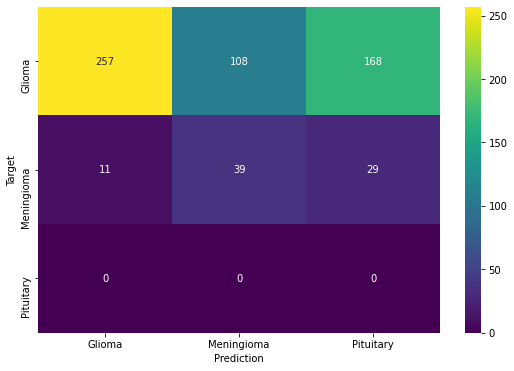


Accuracy Score: 0.4837

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.96      0.48      0.64       533
         1.0       0.27      0.49      0.35        79
         2.0       0.00      0.00      0.00         0

    accuracy                           0.48       612
   macro avg       0.41      0.33      0.33       612
weighted avg       0.87      0.48      0.60       612


Precision Score (Class-Wise): 
[0.95895522 0.26530612 0.        ]
Average Precision Score: 0.4080871154431922

Recall Score (Class-Wise): 
[0.48217636 0.49367089 0.        ]
Average Recall Score: 0.3252824154336967

F1 Score (Class-Wise): 
[0.64169788 0.34513274 0.        ]
Average F1: 0.3289435403385886

Finished Training

Training Duration 0.74 minutes
GPU memory used : 108452864 kb
GPU memory cached : 3300917248 kb


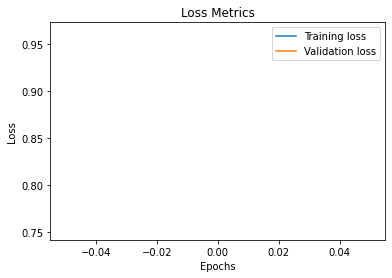

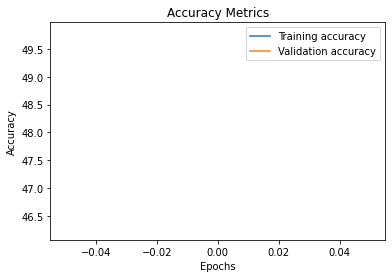

In [10]:
batch_size = 32

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'inceptionv3_frozen_wo_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=plain_transform)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = inception_v3(aux_logits=False)

    for params in model.parameters():
        params.requires_grad = False

    model.fc = nn.Linear(model.fc.in_features, 3)
    
    for params in model.fc.parameters():
        params.requires_grad = True
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb".format(torch.cuda.memory_reserved()))

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr) 

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('inceptionv3_test_results.csv', index=False)

FOLD 1



/usr/local/lib/python3.7/dist-packages/torchvision/models/inception.py:82: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)



Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.224653  Accuracy: 12.500000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.938833  Accuracy: 42.309253%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.763236  Accuracy: 42.508143%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.197823  Accuracy: 44.456522%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.078146  Accuracy: 45.518964%
Epoch 1 | Training Accuracy: 45.518963% | Training Loss: 1.078146
Test accuracy: 61.911526% | Test Loss: 0.830730
Test accuracy (wo augmentation): 62.662338% | Test Loss: 0.560989
Test Metrics: 



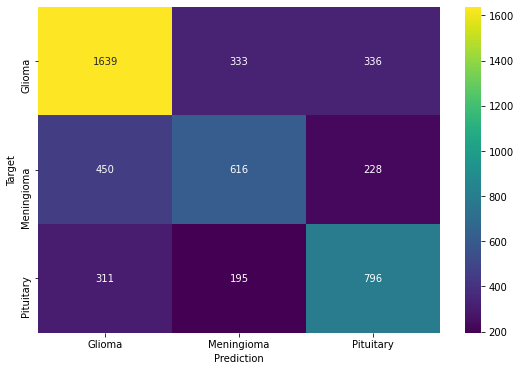


Accuracy Score: 0.6221

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70      2308
         1.0       0.54      0.48      0.51      1294
         2.0       0.59      0.61      0.60      1302

    accuracy                           0.62      4904
   macro avg       0.60      0.60      0.60      4904
weighted avg       0.62      0.62      0.62      4904


Precision Score (Class-Wise): 
[0.68291667 0.53846154 0.58529412]
Average Precision Score: 0.6022241075917547

Recall Score (Class-Wise): 
[0.71013865 0.47604328 0.61136713]
Average Recall Score: 0.5991830174459724

F1 Score (Class-Wise): 
[0.69626168 0.50533224 0.59804658]
Average F1: 0.5998801677670845



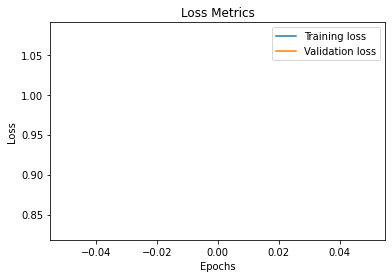

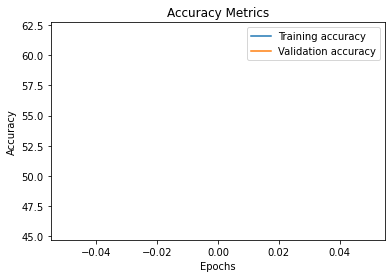

Test Metrics (wo augmentation): 



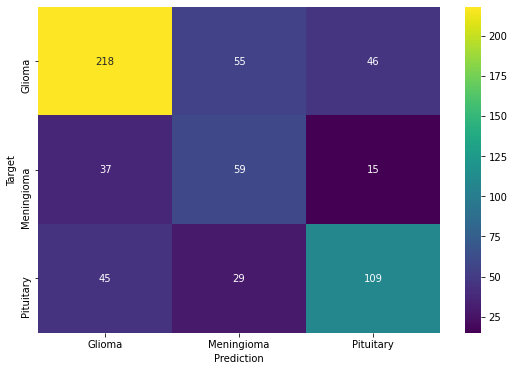


Accuracy Score: 0.6297

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70       319
         1.0       0.41      0.53      0.46       111
         2.0       0.64      0.60      0.62       183

    accuracy                           0.63       613
   macro avg       0.59      0.60      0.60       613
weighted avg       0.64      0.63      0.64       613


Precision Score (Class-Wise): 
[0.72666667 0.41258741 0.64117647]
Average Precision Score: 0.5934768499474382

Recall Score (Class-Wise): 
[0.68338558 0.53153153 0.59562842]
Average Recall Score: 0.6035151755897941

F1 Score (Class-Wise): 
[0.70436187 0.46456693 0.61756374]
Average F1: 0.5954975141669786



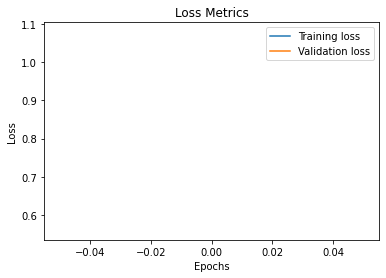

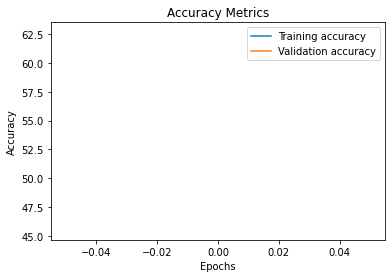

Finished Training

Training Duration 2.94 minutes
GPU memory used : 108747776 kb
GPU memory cached : 3300917248 kb

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.126562  Accuracy: 37.500000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.151958  Accuracy: 43.770292%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.834355  Accuracy: 46.824104%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.104645  Accuracy: 47.126359%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.596233  Accuracy: 46.411093%
Epoch 1 | Training Accuracy: 46.411095% | Training Loss: 0.596233
Test accuracy: 53.916397% | Test Loss: 0.575927
Test accuracy (wo augmentation): 54.220779% | Test Loss: 0.608324
Test Metrics: 



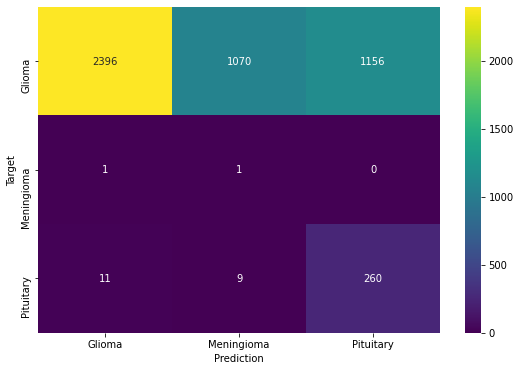


Accuracy Score: 0.5418

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.52      0.68      4622
         1.0       0.00      0.50      0.00         2
         2.0       0.18      0.93      0.31       280

    accuracy                           0.54      4904
   macro avg       0.39      0.65      0.33      4904
weighted avg       0.95      0.54      0.66      4904


Precision Score (Class-Wise): 
[9.95016611e-01 9.25925926e-04 1.83615819e-01]
Average Precision Score: 0.3931861188102155

Recall Score (Class-Wise): 
[0.51839031 0.5        0.92857143]
Average Recall Score: 0.6489872452659126

F1 Score (Class-Wise): 
[0.68165007 0.00184843 0.30660377]
Average F1: 0.3300340911813836



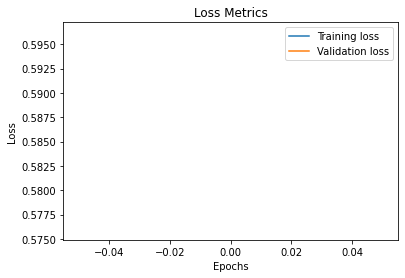

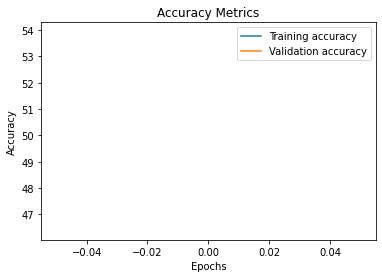

Test Metrics (wo augmentation): 



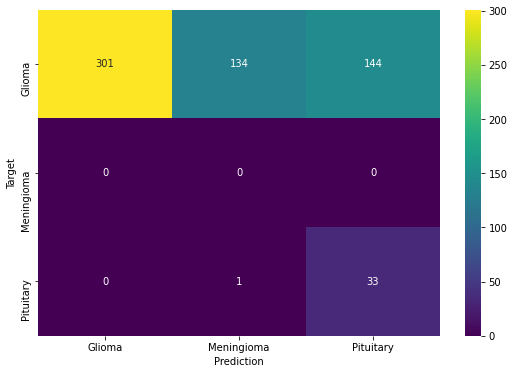


Accuracy Score: 0.5449

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.52      0.68       579
         1.0       0.00      0.00      0.00         0
         2.0       0.19      0.97      0.31        34

    accuracy                           0.54       613
   macro avg       0.40      0.50      0.33       613
weighted avg       0.95      0.54      0.66       613


Precision Score (Class-Wise): 
[1.         0.         0.18644068]
Average Precision Score: 0.39548022598870053

Recall Score (Class-Wise): 
[0.51986183 0.         0.97058824]
Average Recall Score: 0.4968166886789258

F1 Score (Class-Wise): 
[0.68409091 0.         0.31279621]
Average F1: 0.33229570587390495



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


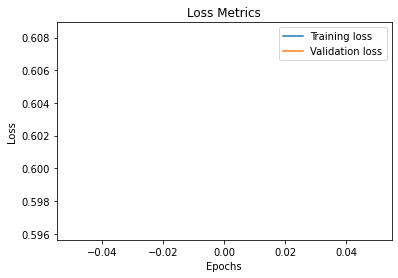

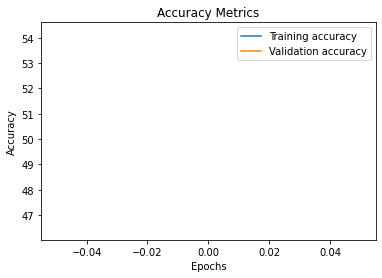

Finished Training

Training Duration 2.94 minutes
GPU memory used : 108420096 kb
GPU memory cached : 3300917248 kb

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.184509  Accuracy: 12.500000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.090485  Accuracy: 43.668831%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.220584  Accuracy: 46.528909%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.069816  Accuracy: 47.017663%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.755433  Accuracy: 47.084013%
Epoch 1 | Training Accuracy: 47.084015% | Training Loss: 0.755433
Test accuracy: 50.243507% | Test Loss: 0.636211
Test accuracy (wo augmentation): 51.461040% | Test Loss: 1.392787
Test Metrics: 



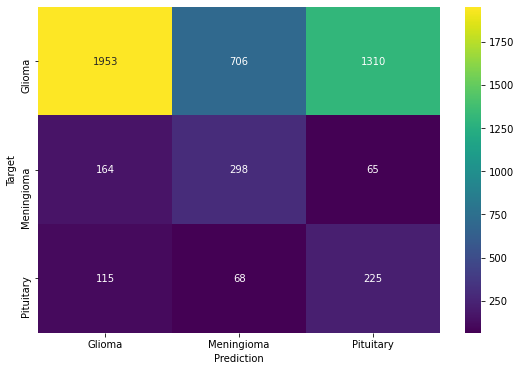


Accuracy Score: 0.5049

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.88      0.49      0.63      3969
         1.0       0.28      0.57      0.37       527
         2.0       0.14      0.55      0.22       408

    accuracy                           0.50      4904
   macro avg       0.43      0.54      0.41      4904
weighted avg       0.75      0.50      0.57      4904


Precision Score (Class-Wise): 
[0.875      0.27798507 0.140625  ]
Average Precision Score: 0.4312033582089552

Recall Score (Class-Wise): 
[0.49206349 0.5654649  0.55147059]
Average Recall Score: 0.5363329919781533

F1 Score (Class-Wise): 
[0.6298984  0.37273296 0.22410359]
Average F1: 0.4089116490798304



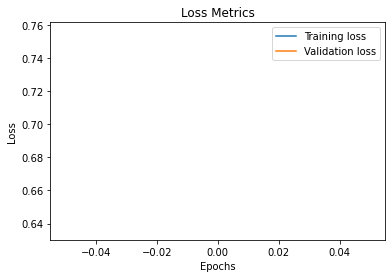

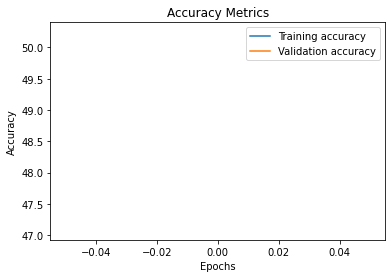

Test Metrics (wo augmentation): 



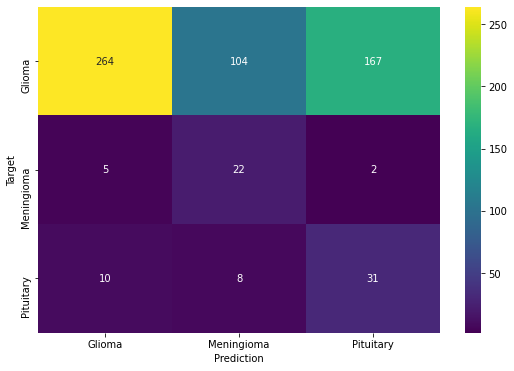


Accuracy Score: 0.5171

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.95      0.49      0.65       535
         1.0       0.16      0.76      0.27        29
         2.0       0.15      0.63      0.25        49

    accuracy                           0.52       613
   macro avg       0.42      0.63      0.39       613
weighted avg       0.85      0.52      0.60       613


Precision Score (Class-Wise): 
[0.94623656 0.1641791  0.155     ]
Average Precision Score: 0.421805221205799

Recall Score (Class-Wise): 
[0.49345794 0.75862069 0.63265306]
Average Recall Score: 0.6282438982682986

F1 Score (Class-Wise): 
[0.64864865 0.26993865 0.24899598]
Average F1: 0.38919442763038004



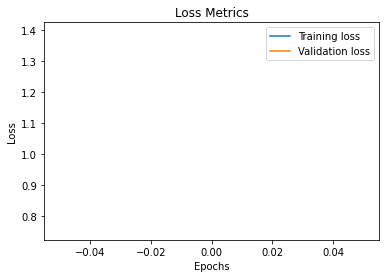

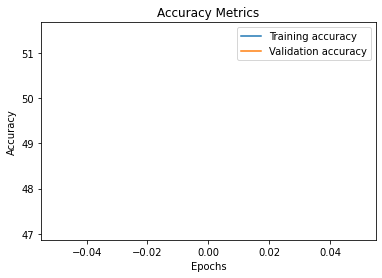

Finished Training

Training Duration 2.94 minutes
GPU memory used : 108813312 kb
GPU memory cached : 3300917248 kb

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.215371  Accuracy: 9.375000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.241226  Accuracy: 40.564123%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.794177  Accuracy: 45.358306%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.640087  Accuracy: 46.385870%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.305576  Accuracy: 46.507953%
Epoch 1 | Training Accuracy: 46.507954% | Training Loss: 1.305576
Test accuracy: 50.730518% | Test Loss: 0.693849
Test accuracy (wo augmentation): 50.162338% | Test Loss: 0.608656
Test Metrics: 



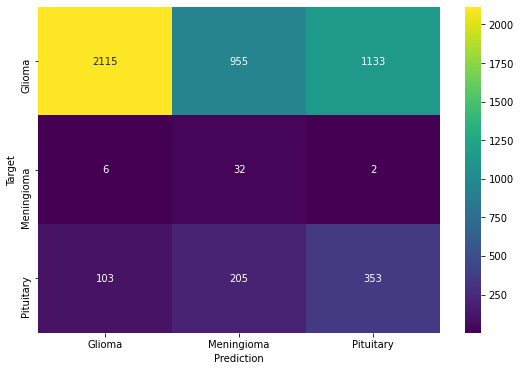


Accuracy Score: 0.5098

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.95      0.50      0.66      4203
         1.0       0.03      0.80      0.05        40
         2.0       0.24      0.53      0.33       661

    accuracy                           0.51      4904
   macro avg       0.41      0.61      0.35      4904
weighted avg       0.85      0.51      0.61      4904


Precision Score (Class-Wise): 
[0.95098921 0.02684564 0.23723118]
Average Precision Score: 0.405022009670895

Recall Score (Class-Wise): 
[0.50321199 0.8        0.53403933]
Average Recall Score: 0.6124171085921986

F1 Score (Class-Wise): 
[0.65816088 0.05194805 0.3285249 ]
Average F1: 0.34621127700659343



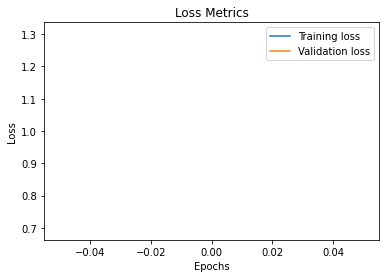

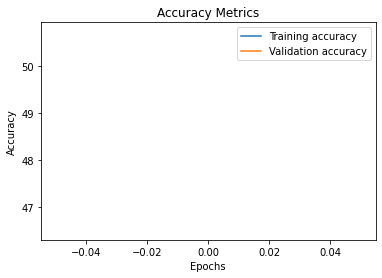

Test Metrics (wo augmentation): 



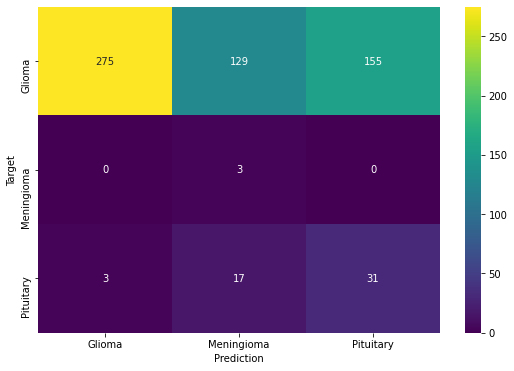


Accuracy Score: 0.5041

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.99      0.49      0.66       559
         1.0       0.02      1.00      0.04         3
         2.0       0.17      0.61      0.26        51

    accuracy                           0.50       613
   macro avg       0.39      0.70      0.32       613
weighted avg       0.92      0.50      0.62       613


Precision Score (Class-Wise): 
[0.98920863 0.02013423 0.16666667]
Average Precision Score: 0.3920031759827038

Recall Score (Class-Wise): 
[0.49194991 1.         0.60784314]
Average Recall Score: 0.6999310159364879

F1 Score (Class-Wise): 
[0.65710872 0.03947368 0.26160338]
Average F1: 0.31939526045426775



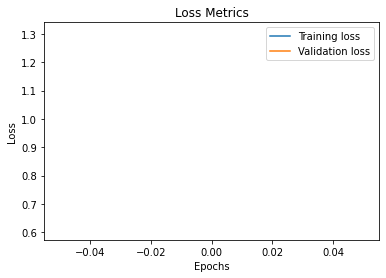

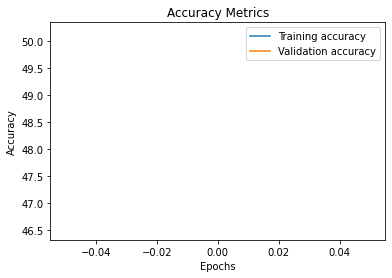

Finished Training

Training Duration 2.94 minutes
GPU memory used : 110189568 kb
GPU memory cached : 3300917248 kb

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.078041  Accuracy: 50.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.980060  Accuracy: 47.443182%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.142144  Accuracy: 45.969055%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.065538  Accuracy: 47.683424%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.878125  Accuracy: 47.507137%
Epoch 1 | Training Accuracy: 47.507137% | Training Loss: 0.878125
Test accuracy: 62.397877% | Test Loss: 1.006229
Test accuracy (wo augmentation): 63.235294% | Test Loss: 1.011190
Test Metrics: 



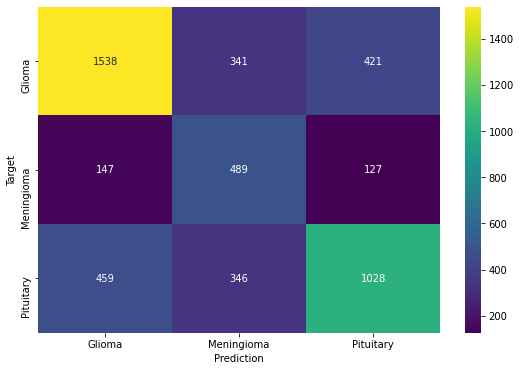


Accuracy Score: 0.6240

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.72      0.67      0.69      2300
         1.0       0.42      0.64      0.50       763
         2.0       0.65      0.56      0.60      1833

    accuracy                           0.62      4896
   macro avg       0.60      0.62      0.60      4896
weighted avg       0.65      0.62      0.63      4896


Precision Score (Class-Wise): 
[0.71735075 0.41581633 0.65228426]
Average Precision Score: 0.5951504455862199

Recall Score (Class-Wise): 
[0.66869565 0.64089122 0.56082924]
Average Recall Score: 0.6234720375756962

F1 Score (Class-Wise): 
[0.69216922 0.5043837  0.60310942]
Average F1: 0.5998874453708173



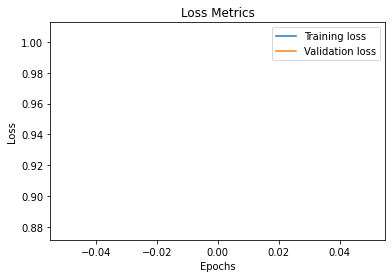

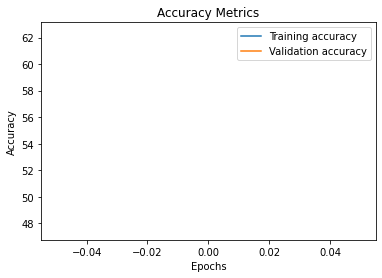

Test Metrics (wo augmentation): 



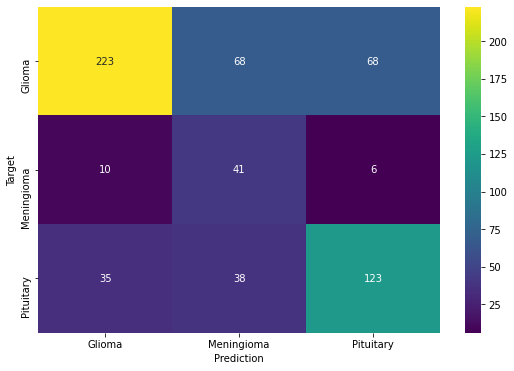


Accuracy Score: 0.6324

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.83      0.62      0.71       359
         1.0       0.28      0.72      0.40        57
         2.0       0.62      0.63      0.63       196

    accuracy                           0.63       612
   macro avg       0.58      0.66      0.58       612
weighted avg       0.71      0.63      0.66       612


Precision Score (Class-Wise): 
[0.83208955 0.27891156 0.62436548]
Average Precision Score: 0.5784555330327196

Recall Score (Class-Wise): 
[0.62116992 0.71929825 0.62755102]
Average Recall Score: 0.6560063941522462

F1 Score (Class-Wise): 
[0.71132376 0.40196078 0.6259542 ]
Average F1: 0.579746248914117



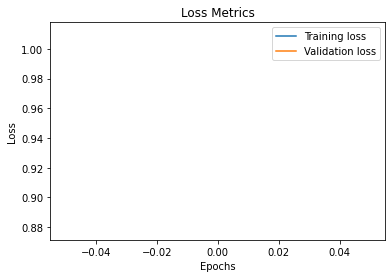

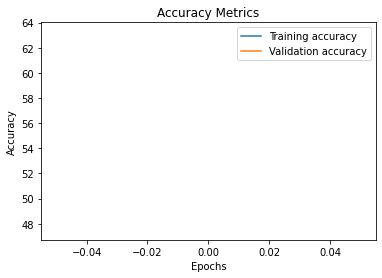

Finished Training

Training Duration 2.96 minutes
GPU memory used : 120232960 kb
GPU memory cached : 3300917248 kb



In [11]:
batch_size = 4 # generates 7 new images + original image - per image, 4 * 8 = 32 images per batch

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'inceptionv3_frozen_w_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=augmentor)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=augmentor)
    
    testloader_plain = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = inception_v3(aux_logits=False)

    for params in model.parameters():
        params.requires_grad = False

    model.fc = nn.Linear(model.fc.in_features, 3)
    
    for params in model.fc.parameters():
        params.requires_grad = True
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []
    test_corr_a = []
    test_loss_a = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size * 8) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size * 8) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * 8 * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

        with torch.no_grad():
          correct = 0
          labels_a = []
          pred_a = []

          new_y = 0.0

          # perform test set evaluation batch wise
          for b, (X, y) in enumerate(testloader_plain):
              b += 1
              # set label to use CUDA if available
              X, y = X.to(device), y.to(device)

              labels_a.extend(y.view(-1).cpu().numpy())

              # perform forward pass
              y_val = model(X).view(-1, n_classes)

              # get argmax of predicted values, which is our label
              predicted = torch.argmax(y_val.data, dim=1).view(-1)

              # append predicted label
              pred_a.extend(predicted.cpu().numpy())

              # calculate loss
              loss = criterion(y_val, y)

              # increment correct with correcly predicted labels per batch
              correct += (predicted == y).sum()

          # append correct samples labels and losses
          test_corr_a.append(correct.item()*100/(batch_size * b))

          test_loss_a.append(loss.item())

        labels_a = torch.Tensor(labels_a)
        pred_a = torch.Tensor(pred_a)

        print(f"Test accuracy (wo augmentation): {torch.mean(torch.tensor(test_corr_a)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss_a)):.6f}")

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr)
       
    print("Test Metrics (wo augmentation): \n")

    plot_confusion_matrix(pred_a, labels_a, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred_a, labels_a)
    
    values = {'model': model_name + '_test_plain', 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss_a)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss_a) 
    plot_accuracy(training_accuracies, test_corr_a)
    
    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb\n".format(torch.cuda.memory_reserved()))

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('inceptionv3_test_results.csv', index=False)